# Classify snow-covered area (SCA) in Sentinel-2 imagery: full pipeline

Rainey Aberle

Department of Geosciences, Boise State University

2022

### Requirements:
- Area of Interest (AOI) shapefile: where snow will be classified in all available images. 
- Google Earth Engine (GEE) account: used to pull DEM over the AOI. Sign up for a free account [here](https://earthengine.google.com/new_signup/). 
- Digital elevation model (DEM) (_optional_): used to extract elevations over the AOI and for each snowline. If no DEM is provided, the ASTER Global DEM will be loaded through GEE. 

### Outline:
__0. Setup__ paths in directory, file locations, authenticate GEE - _modify this section!_

__1. Top of Atmosphere (TOA) imagery:__ Run the full pipeline for Sentinel-2 TOA imagery

__2. Surface Reflectance (SR) iamgery:__ Run the full pipeline for Sentinel-2 SR imagery

-------


### 0. Setup

#### Define paths in directory and desired settings. 
Modify lines located within the following:

`#### MODIFY HERE ####`  

`#####################`

In [1]:
##### MODIFY HERE #####

# -----Paths in directory
site_name = 'SouthCascade'
# path to snow-cover-mapping/
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/'
# path to AOI including the name of the shapefile
AOI_fn = base_path + '../study-sites/' + site_name + '/glacier_outlines/' + site_name + '_USGS_*.shp'
# path to DEM including the name of the tif file
# Note: set DEM_fn=None if you want to use the ASTER GDEM on Google Earth Engine
DEM_fn = base_path + '../study-sites/' + site_name + '/DEMs/' + site_name + '*_DEM*.tif'
# path for output images
out_path = base_path + '../study-sites/' + site_name + '/imagery/'
# path for output figures
figures_out_path = base_path + '../study-sites/' + site_name + '/figures/'

# -----Define image search filters
date_start = '2015-05-01'
date_end = '2023-01-01'
month_start = 5
month_end = 11
cloud_cover_max = 75

# -----Determine settings
plot_results = True # = True to plot figures of results for each image where applicable
skip_clipped = False # = True to skip images where bands appear "clipped", i.e. max blue SR < 0.8
crop_to_AOI = True # = True to crop images to AOI before calculating SCA
save_outputs = True # = True to save SCA images to file
save_figures = True # = True to save SCA output figures to file

#######################

# -----Import packages
import xarray as xr
import os
import numpy as np
import glob
from matplotlib import pyplot as plt, dates
import matplotlib
import rasterio as rio
import geopandas as gpd
import pandas as pd
import sys
import ee
import pickle
import time

# -----Set paths for output files
im_masked_path = out_path + 'masked/'
im_classified_path = out_path + 'classified/'
snowlines_path = out_path + 'snowlines/'

# -----Add path to functions
sys.path.insert(1, base_path+'functions/')
import pipeline_utils_REORG as f

# -----Load dataset dictionary
with open(base_path + 'inputs-outputs/datasets_characteristics.pkl', 'rb') as fn:
    dataset_dict = pickle.load(fn)


#### Authenticate and initialize Google Earth Engine (GEE). 

__Note:__ The first time you run the following cell, you will be asked to authenticate your GEE account for use in this notebook. This will send you to an external web page, where you will walk through the GEE authentication workflow and copy an authentication code back in this notebook when prompted. 

In [2]:
try:
    ee.Initialize()
except: 
    ee.Authenticate()
    ee.Initialize()

#### Load AOI and DEM

In [3]:
# -----Load AOI as gpd.GeoDataFrame
AOI_fn = glob.glob(AOI_fn)[0]
AOI = gpd.read_file(AOI_fn)
# reproject the AOI to WGS to solve for the optimal UTM zone
AOI_WGS = AOI.to_crs(4326)
AOI_WGS_centroid = [AOI_WGS.geometry[0].centroid.xy[0][0],
                    AOI_WGS.geometry[0].centroid.xy[1][0]]
epsg_UTM = f.convert_wgs_to_utm(AOI_WGS_centroid[0], AOI_WGS_centroid[1])
    
# -----Load DEM as Xarray DataSet
if DEM_fn==None:
    # query GEE for DEM
    DEM, AOI_UTM = f.query_GEE_for_DEM(AOI)
else:
    # reproject AOI to UTM
    AOI_UTM = AOI.to_crs(str(epsg_UTM))
    # load DEM as xarray DataSet
    DEM_fn = glob.glob(DEM_fn)[0]
    DEM = xr.open_dataset(DEM_fn)
    DEM = DEM.rename({'band_data': 'elevation'})
    # reproject the DEM to the optimal UTM zone
    DEM = DEM.rio.reproject(str('EPSG:'+epsg_UTM))

## 1. Top of Atmosphere (TOA) imagery

2015-05-01 2023-01-01
----------
Querying GEE for Sentinel-2 TOA imagery...
Adjusting and filtering image collection by AOI coverage...
192 images found
 
2016-06-17T19:02:58


Downloading:   0%|          | 0.00/1.94M [00:00<?, ?iB/s]

Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


2016-06-17T19:02:58
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


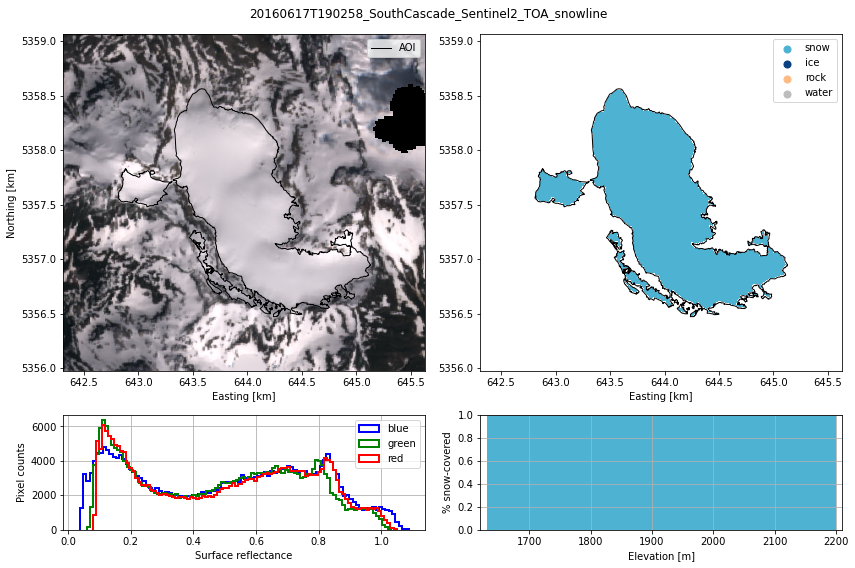

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160617T190258_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-06-17T19:02:58


Downloading:   0%|          | 0.00/1.94M [00:00<?, ?iB/s]

2016-06-17T19:02:58
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


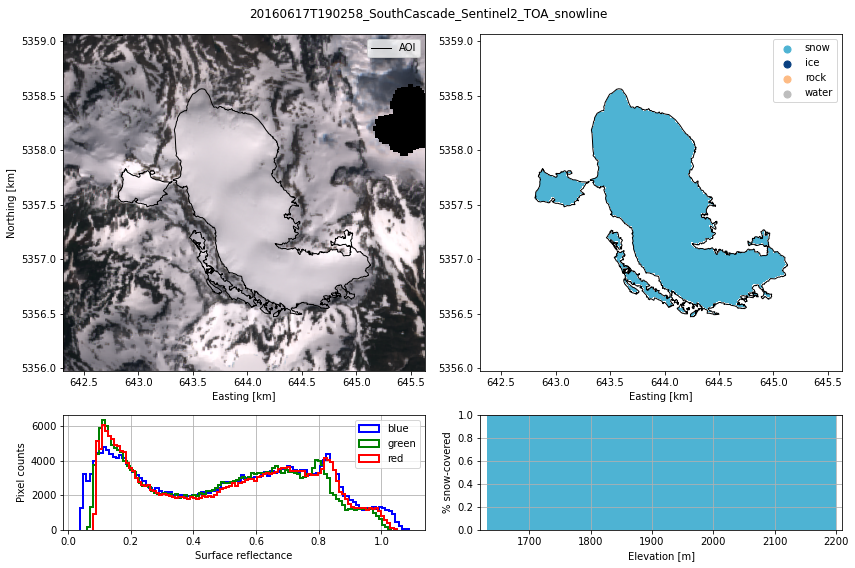

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160617T190258_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-06-30T19:17:29


Downloading:   0%|          | 0.00/1.69M [00:00<?, ?iB/s]

2016-06-30T19:17:29
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


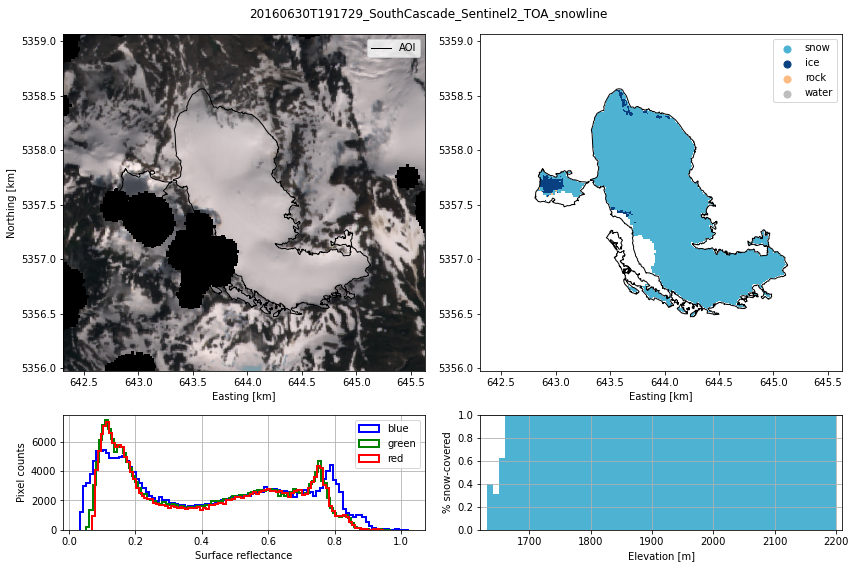

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160630T191729_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-06-30T19:17:29


Downloading:   0%|          | 0.00/1.69M [00:00<?, ?iB/s]

2016-06-30T19:17:29
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


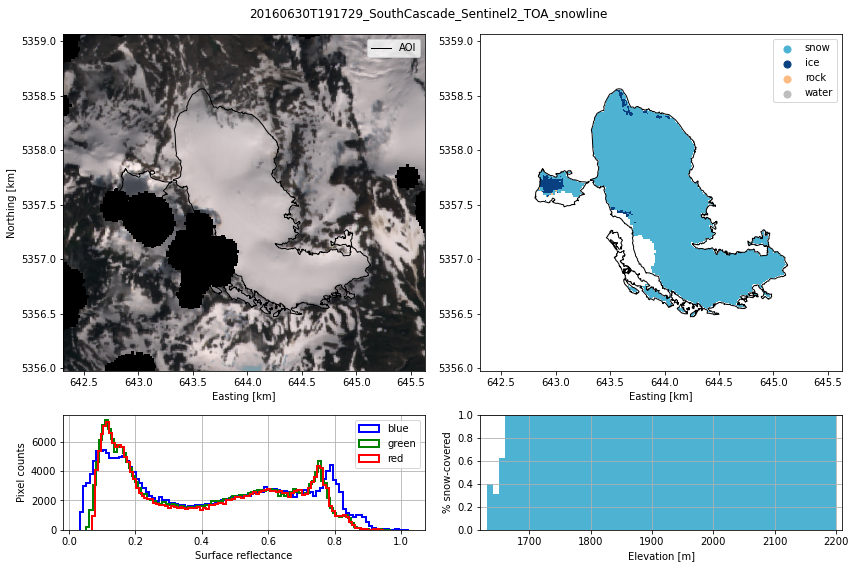

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160630T191729_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-07-27T19:02:38


Downloading:   0%|          | 0.00/1.59M [00:00<?, ?iB/s]

2016-07-27T19:02:38
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


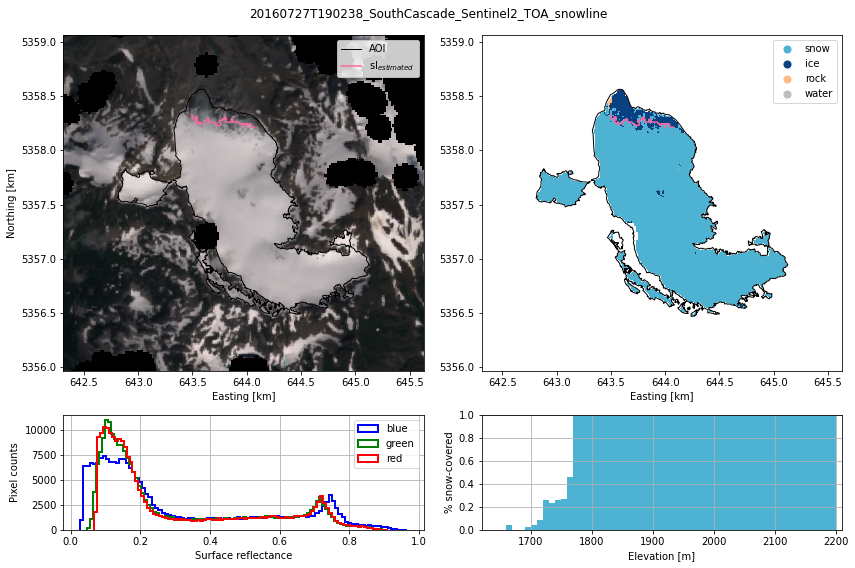

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160727T190238_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-07-27T19:02:38


Downloading:   0%|          | 0.00/1.59M [00:00<?, ?iB/s]

2016-07-27T19:02:38
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


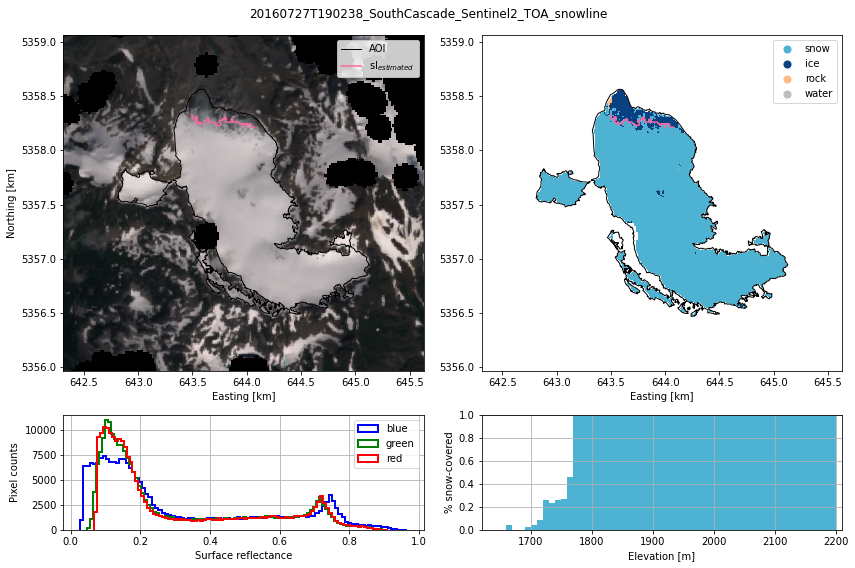

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160727T190238_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-08-16T19:09:39


Downloading:   0%|          | 0.00/1.54M [00:00<?, ?iB/s]

2016-08-16T19:09:39
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


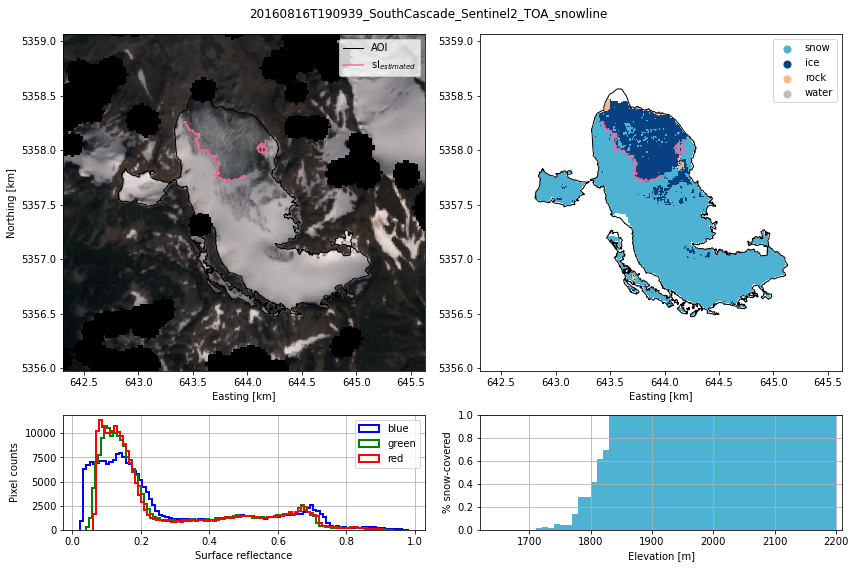

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160816T190939_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-08-16T19:09:39


Downloading:   0%|          | 0.00/1.54M [00:00<?, ?iB/s]

2016-08-16T19:09:39
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


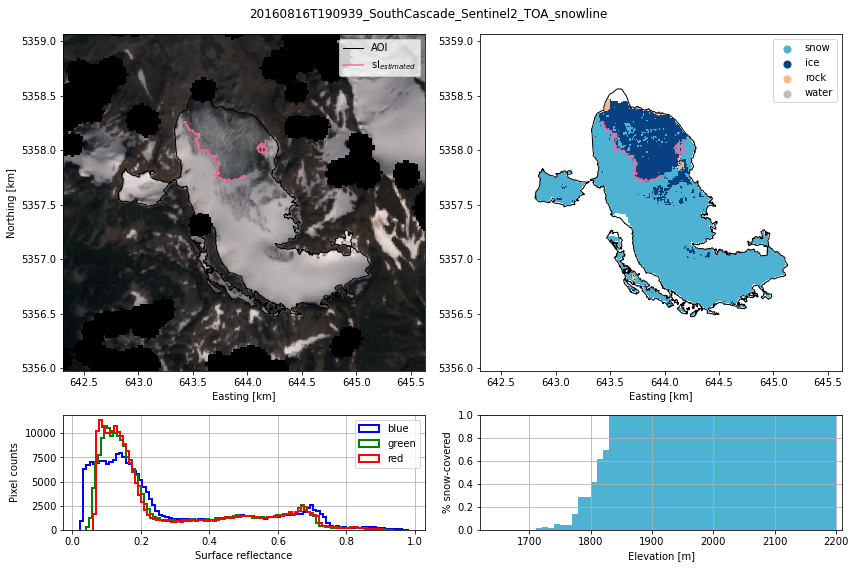

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160816T190939_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-08-29T19:15:58


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?iB/s]

2016-08-29T19:15:58
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


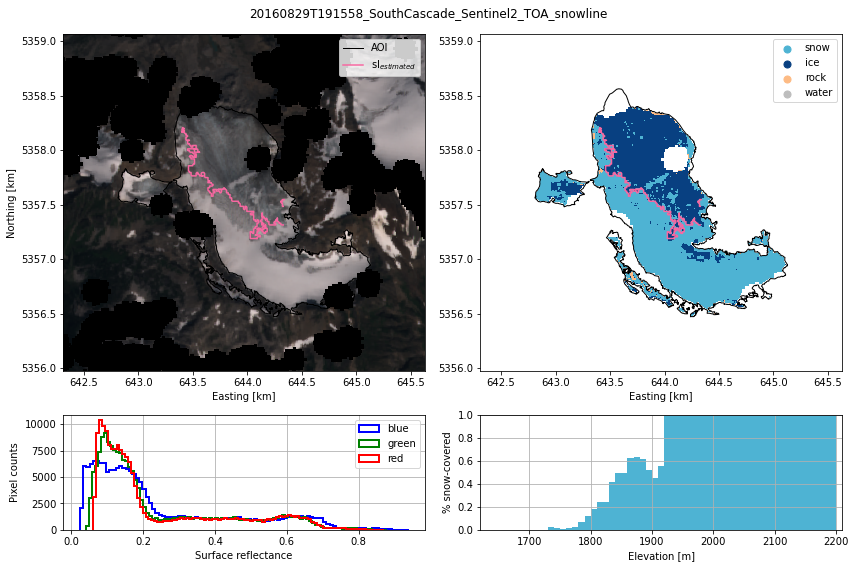

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160829T191558_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-08-29T19:15:58


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?iB/s]

2016-08-29T19:15:58
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


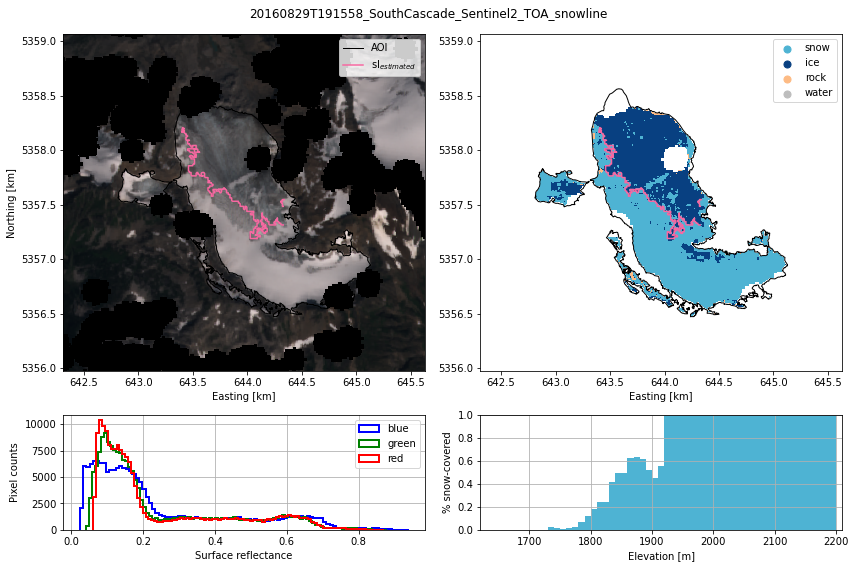

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20160829T191558_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-10-28T19:15:13


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?iB/s]

2016-10-28T19:15:13
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


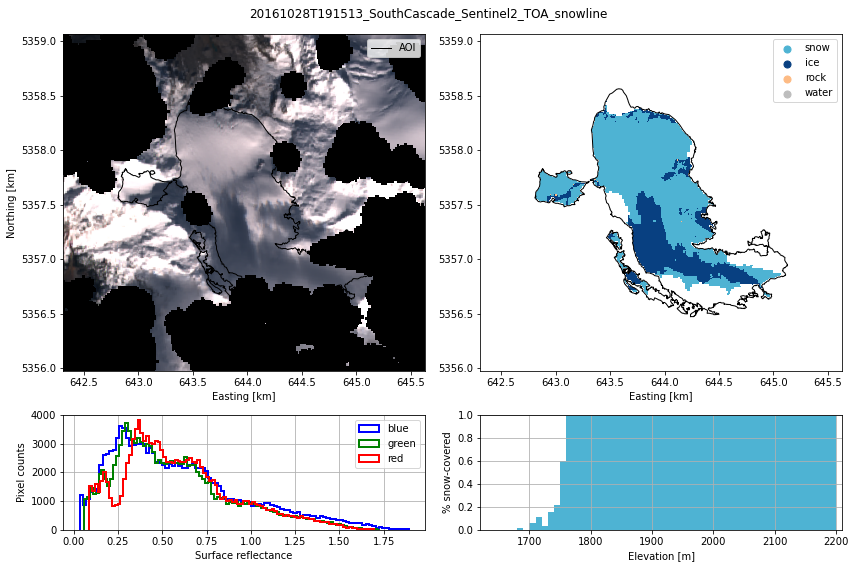

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20161028T191513_SouthCascade_Sentinel2_TOA_snowline.png
 
2016-10-28T19:15:13


Downloading:   0%|          | 0.00/1.00M [00:00<?, ?iB/s]

2016-10-28T19:15:13
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


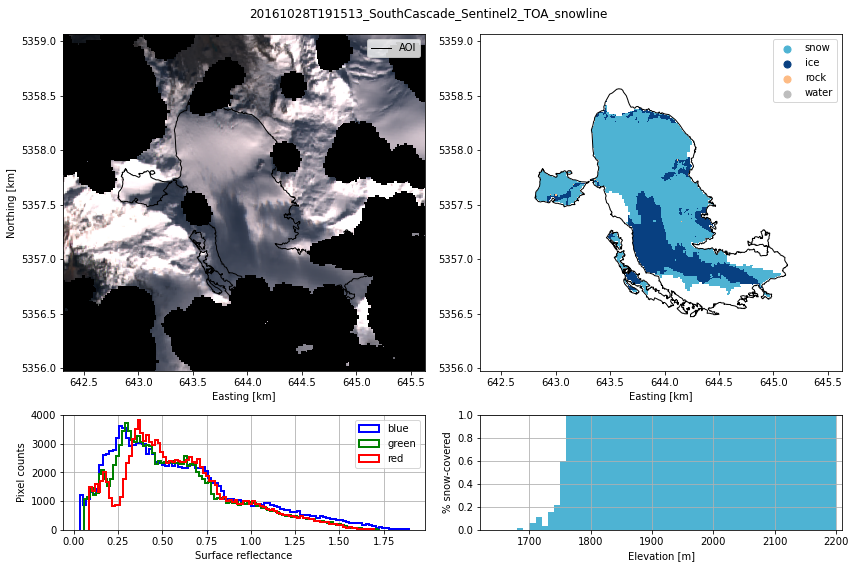

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20161028T191513_SouthCascade_Sentinel2_TOA_snowline.png
 
2017-05-23T19:10:59


Downloading:   0%|          | 0.00/1.97M [00:00<?, ?iB/s]

2017-05-23T19:10:59
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


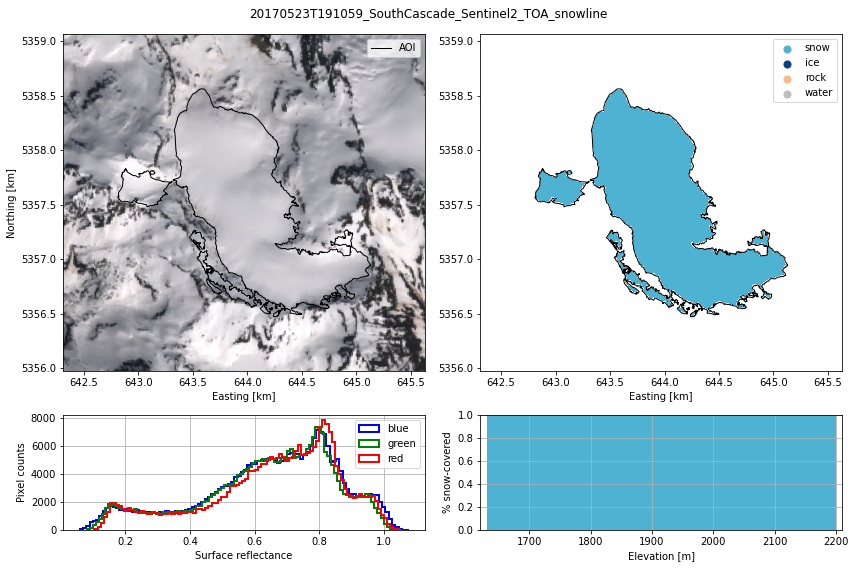

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20170523T191059_SouthCascade_Sentinel2_TOA_snowline.png
 
2017-06-05T19:15:34


Downloading:   0%|          | 0.00/1.94M [00:00<?, ?iB/s]

2017-06-05T19:15:34
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


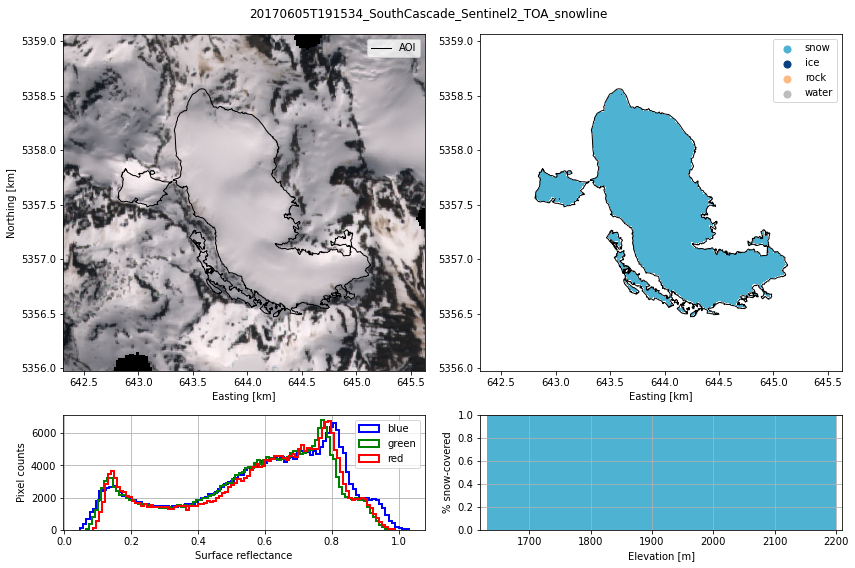

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20170605T191534_SouthCascade_Sentinel2_TOA_snowline.png
 
2017-06-25T19:18:41


Downloading:   0%|          | 0.00/1.94M [00:00<?, ?iB/s]

2017-06-25T19:18:41
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


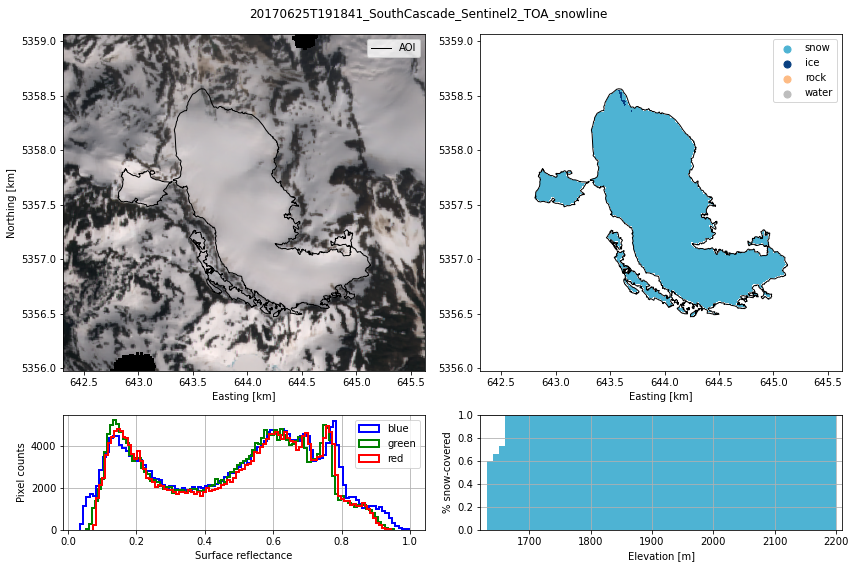

figure saved to file:/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/../study-sites/SouthCascade/figures/20170625T191841_SouthCascade_Sentinel2_TOA_snowline.png
 
2017-07-02T19:07:08


Downloading:   0%|          | 0.00/1.89M [00:00<?, ?iB/s]

2017-07-02T19:07:08
classified image already exists in file, loading...


/Users/raineyaberle/opt/anaconda3/envs/planet-snow/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [ ]:
# -----Set up
print(date_start + ' ' + date_end)
print('----------')
# load trained classifier and feature columns
clf_fn = base_path+'inputs-outputs/S2_TOA_classifier_all_sites.sav'
clf = pickle.load(open(clf_fn, 'rb'))
feature_cols_fn = base_path+'inputs-outputs/S2_TOA_feature_cols.pkl'
feature_cols = pickle.load(open(feature_cols_fn,'rb'))

# -----Query GEE for imagery
dataset = 'Sentinel2_TOA'
S2_im_list = f.query_GEE_for_Sentinel2(dataset, dataset_dict, site_name, 
                                     AOI_UTM, date_start, date_end, month_start, 
                                     month_end, cloud_cover_max)
S2_im_list_size = S2_im_list.size().getInfo()

# -----Loop through images
if S2_im_list_size==0: # check that images were found
    print('No images found to classify, quiting...')
else:
    
    im_count = 0 # image counter
    for i in range(0, S2_im_list_size):
        
        # select image by index
        im = ee.Image(ee.List(S2_im_list).get(i))
        # get image time
        im_date = im.date().format(None, 'GMT').getInfo()
        print(' ')
        print(im_date)
        
        # -----Convert image to xarray.Dataset
        im_xr = im.wx.to_xarray(scale=dataset_dict[dataset]['resolution_m'], crs='EPSG:4326')
        # reproject to UTM CRS
        im_xr_UTM = im_xr.rio.reproject('EPSG:'+epsg_UTM)
        # replace no data values with NaN and account for image scalar
        bands = [band for band in dataset_dict[dataset]['bands'] if 'QA' not in band]
        for band in bands:
            im_xr_UTM[band] = xr.where(im_xr_UTM[band] != dataset_dict[dataset]['no_data_value'],
                                       im_xr_UTM[band] / dataset_dict[dataset]['im_scalar'], np.nan)
        
        # -----Add NDSI band
        im_xr_UTM['NDSI'] = ((im_xr_UTM[dataset_dict[dataset]['NDSI'][0]] - im_xr_UTM[dataset_dict[dataset]['NDSI'][1]]) 
                             / (im_xr_UTM[dataset_dict[dataset]['NDSI'][0]] + im_xr_UTM[dataset_dict[dataset]['NDSI'][1]]))
        
        # -----Classify image
        im_classified = f.classify_image(im_xr_UTM, clf, feature_cols, crop_to_AOI, AOI_UTM, 
                                       dataset, dataset_dict, site_name, im_classified_path)
        
        # -----Delineate snowline(s)
        snowline_df = f.delineate_im_snowline(im_xr_UTM, im_classified, site_name, AOI, DEM, 
                                              dataset_dict, dataset, im_date, out_path, 
                                              figures_out_path, plot_results)


## 2. Surface Reflectance (SR) imagery

In [ ]:
# -----Set up
print(date_start + ' ' + date_end)
print('----------')
# load trained classifier and feature columns
clf_fn = base_path+'inputs-outputs/S2_SR_classifier_all_sites.sav'
clf = pickle.load(open(clf_fn, 'rb'))
feature_cols_fn = base_path+'inputs-outputs/S2_SR_feature_cols.pkl'
feature_cols = pickle.load(open(feature_cols_fn,'rb'))

# -----Query GEE for imagery
dataset = 'Sentinel2_SR'
S2_im_list = f.query_GEE_for_Sentinel2(dataset, dataset_dict, site_name, 
                                     AOI_UTM, date_start, date_end, month_start, 
                                     month_end, cloud_cover_max)
S2_im_list_size = S2_im_list.size().getInfo()

# -----Loop through images
if S2_im_list_size==0: # check that images were found
    print('No images found to classify, quiting...')
else:
    
    im_count = 0 # image counter
    for i in range(0, S2_im_list_size):
        
        # select image by index
        im = ee.Image(ee.List(S2_im_list).get(i))
        # get image time
        im_date = im.date().format(None, 'GMT').getInfo()
        print(' ')
        print(im_date)
        
        # -----Convert image to xarray.Dataset
        im_xr = im.wx.to_xarray(scale=dataset_dict[dataset]['resolution_m'], crs='EPSG:4326')
        # reproject to UTM CRS
        im_xr_UTM = im_xr.rio.reproject('EPSG:'+epsg_UTM)
        # replace no data values with NaN and account for image scalar
        bands = [band for band in dataset_dict[dataset]['bands'] if 'QA' not in band]
        for band in bands:
            im_xr_UTM[band] = xr.where(im_xr_UTM[band] != dataset_dict[dataset]['no_data_value'],
                                       im_xr_UTM[band] / dataset_dict[dataset]['im_scalar'], np.nan)
        
        # -----Add NDSI band
        im_xr_UTM['NDSI'] = ((im_xr_UTM[dataset_dict[dataset]['NDSI'][0]] - im_xr_UTM[dataset_dict[dataset]['NDSI'][1]]) 
                             / (im_xr_UTM[dataset_dict[dataset]['NDSI'][0]] + im_xr_UTM[dataset_dict[dataset]['NDSI'][1]]))
        
        # -----Classify image
        im_classified = f.classify_image(im_xr_UTM, clf, feature_cols, crop_to_AOI, AOI_UTM, 
                                       dataset, dataset_dict, site_name, im_classified_path)
        
        # -----Delineate snowline(s)
        snowline_df = f.delineate_im_snowline(im_xr_UTM, im_classified, site_name, AOI, DEM, 
                                              dataset_dict, dataset, im_date, out_path, 
                                              figures_out_path, plot_results)
